# Plot of results

In [1]:
import re, sys, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pygrep(match, filelist, processline=lambda x: x):
    output=[]
    for f in filter(os.path.isfile, filelist):
        for line in open(f).readlines():
            if re.match(match, line):
                output.append(processline(line))
    return output

def line2data(line):
    newline = line.replace('WallClockTime: ', '').replace('Pre:','').replace('Solve: ','').replace('Post: ','').replace('Total: ','')
    return [float(x) for x in newline.split()]

def averageoutfile(file, match='WallClockTime'):
    return np.mean(np.array(pygrep(match, [file], processline=line2data)),axis=0)

In [3]:
caselist=[ 
    {'NRANKS':4,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0004/Nodes_0004-1515118.out'},
    {'NRANKS':8,   'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0008/Nodes_0008-1515119.out'},
    {'NRANKS':16,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0016/Nodes_0016-1515120.out'},
    {'NRANKS':32,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0032/Nodes_0032-1515121.out'},
    {'NRANKS':64,  'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0064/Nodes_0064-1508687.out'},
    {'NRANKS':128, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0128/Nodes_0128-1508688.out'},
    {'NRANKS':256, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0256/Nodes_0256-1508689.out'},
    {'NRANKS':512, 'file':'/lustre/orion/cfd162/scratch/lcheung/ALCC_Scaling/Baseline_level0/Nodes_0512/Nodes_0512-1508690.out'},
]

In [4]:
print("%10s %10s %10s %10s %10s"%('Nranks', 'Pre', 'Solve', 'Post', 'Total'))
print("%10s %10s %10s %10s %10s"%('------', '---', '-----', '----', '-----'))
for case in caselist:
    #print(case['NRANKS'])
    case['avgstats']=averageoutfile(case['file'])
    print("%10s %10.4f %10.4f %10.4f %10.4f"%(case['NRANKS'], case['avgstats'][1], case['avgstats'][2], case['avgstats'][3], case['avgstats'][4]))

    Nranks        Pre      Solve       Post      Total
    ------        ---      -----       ----      -----
         4     0.1111    17.1593     1.5011    18.7708
         8     0.0539     8.5555     0.7626     9.3721
        16     0.0267     4.3321     0.4512     4.8099
        32     0.0133     2.2111     0.2856     2.5099
        64     0.0067     1.0805     0.1998     1.2870
       128     0.0035     0.5990     0.1785     0.7809
       256     0.0020     0.3212     0.1629     0.4861
       512     0.0010     0.1802     0.1612     0.3424


## Make a plot of solver time vs ranks

Text(0.5, 1.0, 'Solve times')

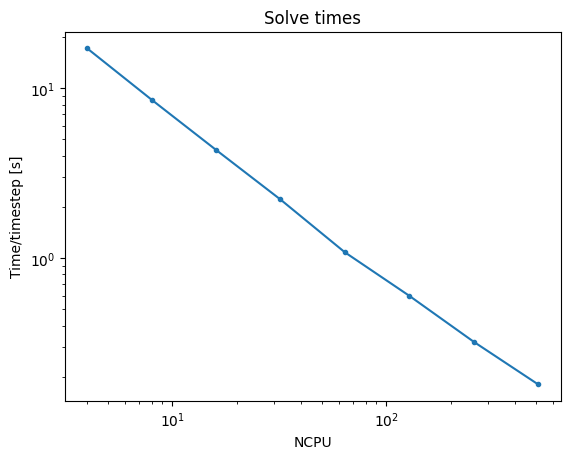

In [5]:
ranks       = [x['NRANKS'] for x in caselist]
solvetimes  = [x['avgstats'][2] for x in caselist]
plt.loglog(ranks, solvetimes, '.-',)
plt.ylabel('Time/timestep [s]')
plt.xlabel('NCPU')
plt.title('Solve times')